## Домашнее задание по теме урока: Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

* [1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока). Сделайте вывод:](#one)
* [2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?](#two)
* [3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации](#three)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [4]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [5]:
X[1].min(), X[1].max()

(0, 10)

In [6]:
X[2].min(), X[2].max()

(450, 2000)

In [7]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [8]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 5.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [9]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.5       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

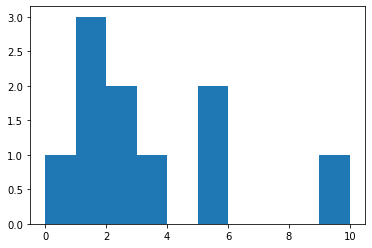

In [10]:
plt.hist(X[1])
plt.show()

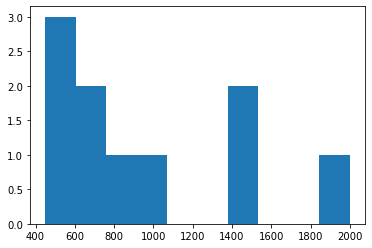

In [11]:
plt.hist(X[2])
plt.show()

In [12]:
X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()
print(X1_mean, X1_std)

3.0 2.8284271247461903


In [13]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-7.07106781e-01, -7.07106781e-01, -3.53553391e-01,
         7.07106781e-01,  0.00000000e+00, -1.06066017e+00,
         7.07106781e-01,  2.47487373e+00, -7.07106781e-01,
        -3.53553391e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

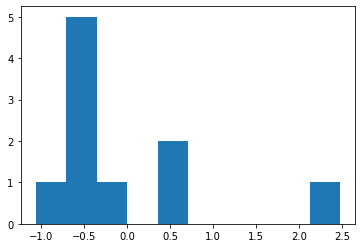

In [14]:
plt.hist(X_st[1])
plt.show()

In [20]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [21]:
X_st[2] = calc_std_fit(X[2])

In [22]:
X_st[3] = calc_std_fit(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [23]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [24]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [25]:
eval_model(X_st, y, iterations=5000, alpha=1e-2)

500 [56.49764487  5.97618072  1.13002887  5.36271668] 25.291912923772255
1000 [56.4999999   6.19170478  0.17666175  6.13242708] 24.95477155270131
1500 [56.5         6.26332144 -0.16462273  6.41324136] 24.91111649186897
2000 [56.5         6.28879432 -0.28736942  6.51451066] 24.90546069427312
2500 [56.5         6.29794747 -0.33154615  6.55097155] 24.904727941020887
3000 [56.5         6.30124127 -0.34744694  6.56409584] 24.904633007028735
3500 [56.5         6.3024268  -0.35317029  6.56881984] 24.9046207075775
4000 [56.5         6.30285352 -0.35523035  6.57052021] 24.904619114086067
4500 [56.5         6.30300712 -0.35597186  6.57113224] 24.904618907636642
5000 [56.5         6.3030624  -0.35623876  6.57135254] 24.90461888088946


array([56.5       ,  6.3030624 , -0.35623876,  6.57135254])

In [26]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
#             print(b, n_batch, start_, end_)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]

            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)

            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [27]:
eval_sgd_model(X_st, y, iterations=50000, qty_in_batch=4, alpha=1e-2)

5000 [56.51062031  6.31269315 -0.36444843  6.58450772] 11.289369280355015
10000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289182006128144
15000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330378
20000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
25000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
30000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
35000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
40000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
45000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
50000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424


array([56.51062035,  6.31272262, -0.3645908 ,  6.58462533])

In [28]:
# lambda = lambda_/2

In [51]:
X

array([[   1,    1,    1,    1,    1,    1,    1,    1,    1,    1],
       [   1,    1,    2,    5,    3,    0,    5,   10,    1,    2],
       [ 500,  700,  750,  600, 1450,  800, 1500, 2000,  450, 1000],
       [   1,    1,    2,    1,    2,    1,    3,    3,    1,    2]])

#### 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока). Сделайте вывод <a class="anchor" id="one"></a>

In [111]:
lambda_ = 10**np.linspace(2,-7,100)*0.5
lambda_

array([5.00000000e+01, 4.05565415e+01, 3.28966612e+01, 2.66834962e+01,
       2.16438064e+01, 1.75559587e+01, 1.42401793e+01, 1.15506485e+01,
       9.36908711e+00, 7.59955541e+00, 6.16423370e+00, 5.00000000e+00,
       4.05565415e+00, 3.28966612e+00, 2.66834962e+00, 2.16438064e+00,
       1.75559587e+00, 1.42401793e+00, 1.15506485e+00, 9.36908711e-01,
       7.59955541e-01, 6.16423370e-01, 5.00000000e-01, 4.05565415e-01,
       3.28966612e-01, 2.66834962e-01, 2.16438064e-01, 1.75559587e-01,
       1.42401793e-01, 1.15506485e-01, 9.36908711e-02, 7.59955541e-02,
       6.16423370e-02, 5.00000000e-02, 4.05565415e-02, 3.28966612e-02,
       2.66834962e-02, 2.16438064e-02, 1.75559587e-02, 1.42401793e-02,
       1.15506485e-02, 9.36908711e-03, 7.59955541e-03, 6.16423370e-03,
       5.00000000e-03, 4.05565415e-03, 3.28966612e-03, 2.66834962e-03,
       2.16438064e-03, 1.75559587e-03, 1.42401793e-03, 1.15506485e-03,
       9.36908711e-04, 7.59955541e-04, 6.16423370e-04, 5.00000000e-04,
      

In [112]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [113]:
coefs = []
for a in lambda_:
    W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=a)
    coefs.append(W)

np.shape(coefs)

(100, 4)

In [114]:
coefs

[array([2.17307692, 0.39247379, 0.37627465, 0.39228959]),
 array([2.65529096, 0.47396635, 0.45337512, 0.47333714]),
 array([3.23813213, 0.56998887, 0.54371091, 0.56863571]),
 array([3.93954765, 0.68212429, 0.64845886, 0.67963665]),
 array([4.77926431, 0.81172938, 0.76844522, 0.80751622]),
 array([5.77828998, 0.95976937, 0.90394954, 0.95299835]),
 array([6.95805124, 1.12664084, 1.05449488, 1.11616679]),
 array([8.33908429, 1.3120095 , 1.2186536 , 1.29629538]),
 array([9.93923249, 1.51469818, 1.39390835, 1.49173553]),
 array([11.77137848,  1.73266179,  1.57661021,  1.69990155]),
 array([13.84085809,  1.96307644,  1.7620665 ,  1.91738529]),
 array([16.14285714,  2.20254737,  1.94476797,  2.14020792]),
 array([18.66024663,  2.44741026,  2.11873362,  2.36418534]),
 array([21.36240688,  2.6940725 ,  2.27792218,  2.58535285]),
 array([24.20555642,  2.93932631,  2.41664317,  2.80037687]),
 array([27.13488745,  3.18057151,  2.52990511,  3.00688326]),
 array([30.08843443,  3.41591029,  2.6136616

Text(0, 0.5, 'weights')

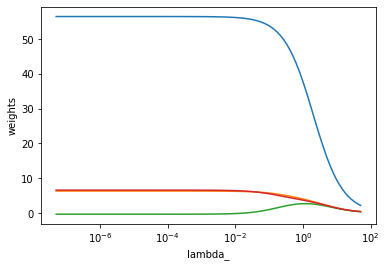

In [116]:
ax = plt.gca()
ax.plot(lambda_, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda_')
plt.ylabel('weights')

***ВЫВОД: с увеличением lambda_ веса снижаются***

#### 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию? <a class="anchor" id="two"></a>

Технически можно, но на практике в этом смысла великого нет. Рассмотернные методы нормализации / масштабирования являются достатоно взаипозаменяемыми. При выборе каждого из вариантов можноруководствоваться тем ,что необходимо получить. Если не хватает понимание какой-метод применить в данной конкретной задачи. МОжно сделать оба метода и на каждом проделать обучение и на тестовой выборке (или на кросс-валидации) сделать вывод ,что лучше.

#### 3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации<a class="anchor" id="three"></a>

In [117]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W)) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W